# Import Library

In [ ]:
# Digunakan untuk pengolahan data dengan bahasa manusia
import nltk
# Digunakan untuk membantu proses lematisasi
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
# Digunakan untuk membaca file JSON
import json 
# Digunakan untuk menyimpan dan membaca data ke dalam atau dari suatu file berformat .pkl.
import pickle
# Digunakan untuk perhitungan numerik
import numpy as np 
# Digunakan untuk membaca dataset dan mengubahnya ke Pandas Dataframe
import pandas as pd
# Digunakan untuk komputasi numerik dengan menggunakan machine learning, deep learning, atau neural network
import tensorflow as tf 
# Digunakan untuk menampung model
from tensorflow.keras.models import Model
# Membantu proses memecah string menjadi token.
from tensorflow.keras.preprocessing.text import Tokenizer
# Digunakan untuk mengisi urutan vektor dengan panjang yang sama
from tensorflow.keras.preprocessing.sequence import pad_sequences 
# Mengekstrak dan menggunakannya untuk pengkodean data
from sklearn.preprocessing import LabelEncoder 
from keras.models import Sequential
# Input digunakan masuk ke jaringan lapisan berikutnya. Embedding mempresentasikan kata menjadi sebuah vektor. Lstm metode arsitektur (RNN) yang biasa digunakan DL
from keras.layers import Input,Flatten,LSTM,Embedding,Dense
# Digunakan sebagai mode loss
from tensorflow.keras.losses import CategoricalCrossentropy
# Digunakan untuk visualisasi
import matplotlib.pyplot as plt 
# Digunakan untuk membantu proses stopwords
from nltk.corpus import stopwords
# Digunakan untuk melakukan random angka
import random
# Digunakan untuk membantu mengubah data kebentuk categorical
from tensorflow.keras.utils import to_categorical
import re

## Download Package

In [ ]:
# Package stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Package sentence tokenizer
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Package lemmatization
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Package multilingual wordnet data
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

# Load Dataset

In [ ]:
# Data tag
tags = []
# Data input atau pattern
inputs = []
# Data respon
responses = {}
# Data kata
words=[] 
# Data Kelas atau Tag
classes = [] 
# Data Kalimat Dokumen
documents = [] 
# Mengabaikan tanda spesial karakter
ignore_words = ['?', '!'] 

# Melakukan import dataset
data_file = open('intents.json').read()
intents = json.loads(data_file)

In [ ]:
for intent in intents['intents']:
  responses[intent['tag']]=intent['responses']
  for lines in intent['patterns']:
    inputs.append(lines)
    tags.append(intent['tag'])
    for pattern in intent['patterns']:
        #tokenize each word
        w = nltk.word_tokenize(pattern)
        words.extend(w)
        #add documents in the corpus
        documents.append((w, intent['tag']))
        # add to our classes list
        if intent['tag'] not in classes:
            classes.append(intent['tag'])

df= pd.DataFrame({"patterns":inputs, "tags":tags})
df

,patterns,tags
0,"hai salam kenal, nama saya",salam
1,haii,salam
2,hei,salam
3,halo,salam
4,hello,salam
...,...,...
91,"Selamat Tinggal, terima kasih",penutup
92,"Dah, sampai jumpa",penutup
93,"Daah, terima kasih",penutup
94,Semoga harimu menyenangkan,penutup


# Preprocessing Data

### Remove Punctutation

In [ ]:
# Menghilangkan punktuasi atau tanda baca
import string
df['patterns'] = df['patterns'].apply(lambda sequence:
                                            [ltrs.lower() for ltrs in sequence if ltrs not in string.punctuation])
df.head()

,patterns,tags
0,"[h, a, i, , s, a, l, a, m, , k, e, n, a, l, ...",salam
1,"[h, a, i, i]",salam
2,"[h, e, i]",salam
3,"[h, a, l, o]",salam
4,"[h, e, l, l, o]",salam


In [ ]:
df['patterns'] = df["patterns"].apply(lambda wrd: ''.join(wrd))
df.head()

,patterns,tags
0,hai salam kenal nama saya,salam
1,haii,salam
2,hei,salam
3,halo,salam
4,hello,salam


### Lemmatization

In [ ]:
# lemmatize, lower each word and remove duplicates
words = [lemmatizer.lemmatize(w.lower()) for w in words if w not in ignore_words]
words = sorted(list(set(words)))

# sort classes
classes = sorted(list(set(classes)))

# documents = combination between patterns and intents
print (len(documents), "documents")

# classes = intents
print (len(classes), "classes", classes)

# words = all words, vocabulary
print (len(words), "unique lemmatized words", words)

610 documents
16 classes ['alamat', 'alasan_menerima', 'gaji', 'info_loker', 'kekurangan', 'kelebihan', 'kontribusi', 'nama', 'pendidikan_terakhir', 'pengalaman', 'penutup', 'posisi', 'salam', 'skill', 'tentang_perusahaan', 'umur']
242 unique lemmatized words [',', '.', '3', '4', '6', '7', 'adalah', 'agar', 'akan', 'akun', 'anak', 'atas', 'bagi', 'baik', 'bapak', 'bapak/ibu', 'bekerja', 'bekerjasama', 'belakang', 'belum', 'beralamat', 'berdiri', 'berdomisili', 'bergerak', 'berhak', 'berharap', 'berikan', 'berinovasi', 'berkenan', 'berkomitmen', 'berkontribusi', 'beroptimis', 'berpengalaman', 'bertempat', 'berusaha', 'besaran', 'bisa', 'cara', 'cocok', 'coding', 'daah', 'dah', 'dalam', 'dan', 'dapat', 'dari', 'datang', 'dengan', 'di', 'diatas', 'dibawah', 'dibidang', 'dibutuhkan', 'didirikan', 'dihidupi', 'dimiliki', 'diposisi', 'diri', 'disetiap', 'diterima', 'ecommerce', 'efektif', 'etika', 'gaji', 'gigih', 'google', 'hai', 'haii', 'hal', 'halo', 'harap', 'hari', 'harimu', 'harus', 'h

In [ ]:
# Menyimpan data words dan classes
pickle.dump(words,open('words.pkl','wb'))
pickle.dump(classes,open('classes.pkl','wb'))

### Tokenization

In [ ]:
# Melakukan tokenisasi data
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(df['patterns'])

# Mengubah teks kedalam bentuk sequence
train = tokenizer.texts_to_sequences(df['patterns'])

# Melihat tokenisasi dari setiap kata
tokenizer.word_index

{'saya': 1,
 'yang': 2,
 'perusahaan': 3,
 'adalah': 4,
 'di': 5,
 'ini': 6,
 'dengan': 7,
 'dalam': 8,
 'memiliki': 9,
 'untuk': 10,
 'bekerja': 11,
 'dapat': 12,
 'kemampuan': 13,
 'melalui': 14,
 'miliki': 15,
 'dan': 16,
 'mengetahuinya': 17,
 'tahun': 18,
 'kerja': 19,
 'kontribusi': 20,
 'baik': 21,
 'kelebihan': 22,
 'memberikan': 23,
 'kekurangan': 24,
 'serta': 25,
 'berikan': 26,
 'diri': 27,
 'saat': 28,
 'tinggal': 29,
 'dari': 30,
 'pengalaman': 31,
 'berkomitmen': 32,
 'harus': 33,
 'sebagai': 34,
 'spg': 35,
 'nama': 36,
 'terima': 37,
 'kasih': 38,
 'umur': 39,
 'pendidikan': 40,
 'tinggi': 41,
 'punya': 42,
 'mampu': 43,
 'solusi': 44,
 'sesuai': 45,
 'posisi': 46,
 'inginkan': 47,
 'media': 48,
 'gaji': 49,
 'bapakibu': 50,
 'tepat': 51,
 'menemukan': 52,
 'akan': 53,
 'sekarang': 54,
 'beralamat': 55,
 'latar': 56,
 'belakang': 57,
 'lulusan': 58,
 'masih': 59,
 'selama': 60,
 'sebelumnya': 61,
 'maaf': 62,
 'tidak': 63,
 'belum': 64,
 'skill': 65,
 'membuat': 66,
 '

### Padding

In [ ]:
# Melakukan padding agar setiap sequence memiliki panjang yang sama
features = pad_sequences(train)

# Menampilkan padding Sequences
print(features)

[[  0   0   0 ... 104  36   1]
 [  0   0   0 ...   0   0 105]
 [  0   0   0 ...   0   0 106]
 ...
 [  0   0   0 ... 236  37  38]
 [  0   0   0 ...  87 237 238]
 [  0   0   0 ...   0 239 240]]


### Encoding Data

In [ ]:
# Melakukan encoding terhadap output atau label (tag)
le = LabelEncoder()
labels = le.fit_transform(df['tags'])

# Menampilkan Label Encodings
print(labels)

[12 12 12 12 12  7  7  7 15 15 15  0  0  0  0  0  0  8  8  8  8  8  8  8
  8  9  9  9  9  9  9 13 13 13 13 13 13 13 13  5  5  5  5  5  5  4  4  4
  4  4  4  4 14 14 14 14 14 14  1  1  1  1  1  1 11 11 11 11 11 11  2  2
  2  2  2  2  6  6  6  6  6  6  6  3  3  3  3  3  3  3  3 10 10 10 10 10]


In [ ]:
# Menyimpan proses label encoder dan tokenizer
pickle.dump(le, open('le.pkl','wb'))
pickle.dump(tokenizer, open('tokenizer.pkl','wb'))

### Input Output Shape & Vocabulary

In [ ]:
# Mengetahui panjang maksimal untuk input data
input_shape = features.shape[1]
print(input_shape)

# Mendefinisikan panjang vocabulary
vocabulary = len(tokenizer.word_index)
print("number of unique words : ",vocabulary)

# Mendefinisikan panjang output
output_length = le.classes_.shape[0]
print("output length: ",output_length)

44
number of unique words :  240
output length:  16


# Modeling

### Build Model

In [ ]:
# Membuat Modeling
model = tf.keras.Sequential()
# Layer Input
model.add(Input(shape=(input_shape,)))
# Layer Embedding
model.add(Embedding(vocabulary+1, 16, input_length=(input_shape,)))
# Layer Long Short Term Memory
model.add(LSTM(10, return_sequences=True))
# Layer Flatten
model.add(Flatten()) 
# Layer Dense
model.add(Dense(output_length, activation="softmax"))

# Compile model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 44, 16)            3856      
                                                                 
 lstm (LSTM)                 (None, 44, 10)            1080      
                                                                 
 flatten (Flatten)           (None, 440)               0         
                                                                 
 dense (Dense)               (None, 16)                7056      
                                                                 
Total params: 11,992
Trainable params: 11,992
Non-trainable params: 0
_________________________________________________________________


### Train Model

In [ ]:
# Untuk melakukan penghentian otomatis pelatihan
from keras.callbacks import TensorBoard, EarlyStopping
callback = EarlyStopping(monitor = 'loss', patience = 1, mode = 'min', restore_best_weights = True)

In [ ]:
train = model.fit(features, labels, epochs=100, callbacks=[callback], verbose=1)

Epoch 1/100
3/3 [==============================] - 2s 21ms/step - loss: 2.7715 - accuracy: 0.0625
Epoch 2/100
3/3 [==============================] - 0s 16ms/step - loss: 2.7640 - accuracy: 0.1250
Epoch 3/100
3/3 [==============================] - 0s 15ms/step - loss: 2.7564 - accuracy: 0.1562
Epoch 4/100
3/3 [==============================] - 0s 14ms/step - loss: 2.7480 - accuracy: 0.1458
Epoch 5/100
3/3 [==============================] - 0s 15ms/step - loss: 2.7388 - accuracy: 0.1458
Epoch 6/100
3/3 [==============================] - 0s 16ms/step - loss: 2.7275 - accuracy: 0.1354
Epoch 7/100
3/3 [==============================] - 0s 15ms/step - loss: 2.7150 - accuracy: 0.1354
Epoch 8/100
3/3 [==============================] - 0s 16ms/step - loss: 2.7002 - accuracy: 0.1458
Epoch 9/100
3/3 [==============================] - 0s 14ms/step - loss: 2.6896 - accuracy: 0.1458
Epoch 10/100
3/3 [==============================] - 0s 15ms/step - loss: 2.6739 - accuracy: 0.1458
Epoch 11/100
3/3 [=

### Model Analysis

In [ ]:
# Membuat fungsi untuk menampilkan plot hasil akurasi dan loss
import matplotlib as mpl
def draw_plot(data, type_data):
  mpl.style.use('seaborn')
  plt.figure(figsize = (20, 5))
  plt.plot(data,'darkblue', label='Train')
  plt.xlabel('Epoch')
  plt.ylabel(type_data)
  plt.legend()

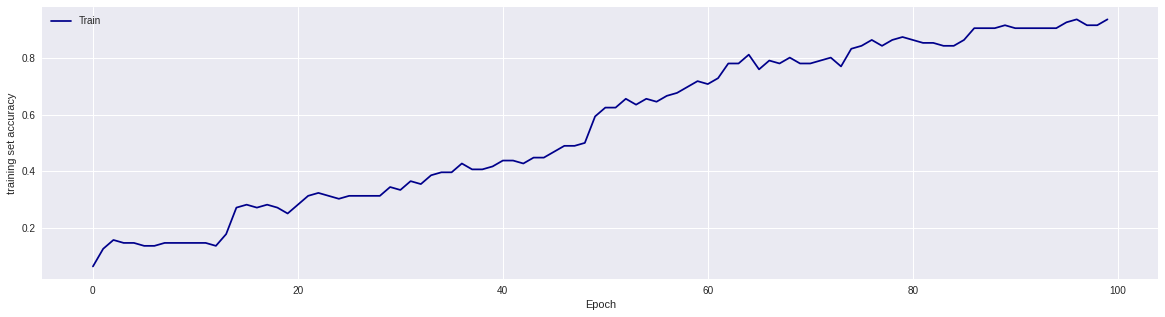

In [ ]:
draw_plot(train.history['accuracy'], 'training set accuracy')

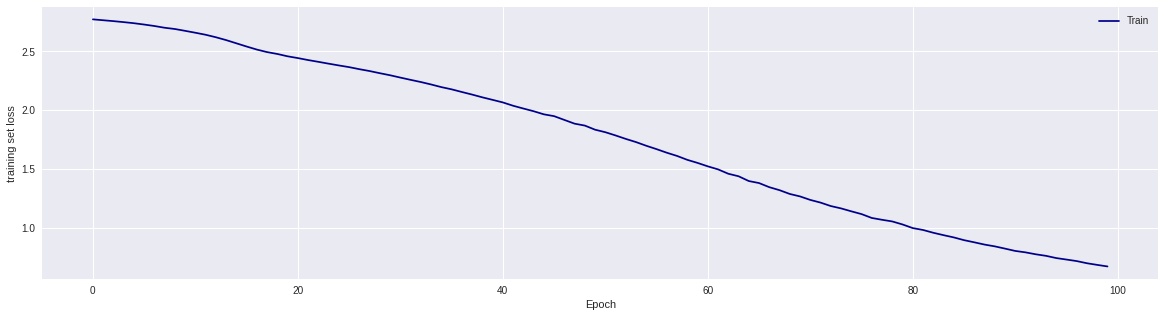

In [ ]:
draw_plot(train.history['loss'], 'training set loss')

### Save Model

In [ ]:
model.save('chatbot_model.h5', train)

# Testing

In [ ]:
# Membuat percakapan pembuka
print("Bot : Selamat datang! Silahkan kirim pesan sapaan untuk memulai proses wawancara")
print("="*60 + "\n")

# Membuat Input Chat
while True:
  # List kosong untuk menampung inputan pengguna
  texts_p = []
  # Untuk input user
  prediction_input = input('User : ')
  
  # Menghapus punktuasi dan konversi ke huruf kecil
  prediction_input = [letters.lower() for letters in prediction_input if letters not in string.punctuation]
  prediction_input = ''.join(prediction_input)
  texts_p.append(prediction_input)

  # Tokenisasi dan Padding
  prediction_input = tokenizer.texts_to_sequences(texts_p)
  prediction_input = np.array(prediction_input).reshape(-1)
  prediction_input = pad_sequences([prediction_input],input_shape)

  # Mendapatkan hasil keluaran pada model 
  output = model.predict(prediction_input)
  output = output.argmax()

  # Menemukan respon sesuai data tag
  response_tag = le.inverse_transform([output])[0]
  print("Bot : ", random.choice(responses[response_tag]))
  print("="*60 + "\n")

  # mendefinisikan respon tag 'penutup' agar bot bisa berhenti
  if response_tag == "penutup":
    break    
    


Bot : Selamat datang! Silahkan kirim pesan sapaan untuk memulai proses wawancara

User : hailo
1/1 [==============================] - 0s 497ms/step
Bot :  Halo, Silahkan perkenalkan diri anda dengan format sebagai berikut: Perkenalkan nama lengkap saya adalah ... (isi titik - titik sesuai data anda) 

User : perkenalkan nama lengkap saya alwizain
1/1 [==============================] - 0s 19ms/step
Bot :  Ceritakan pengalaman kerja Anda dengan format sebagai berikut: Saya memiliki pengalaman kerja di ... selama ... tahun (isi titik - titik sesuai data anda). Jika anda belum memiliki pengalaman kerja, anda bisa mengisi dengan format : saya belum memiliki pengalaman kerja

User : bye
1/1 [==============================] - 0s 20ms/step
Bot :  Halo, Silahkan perkenalkan diri anda dengan format sebagai berikut: Perkenalkan nama lengkap saya adalah ... (isi titik - titik sesuai data anda) 

User : terimakasih
1/1 [==============================] - 0s 20ms/step
Bot :  Halo, Silahkan perkenalka

KeyboardInterrupt: ignored